# **ANN multimodal**  


Queremos entrenar un modelo con imagenes y datos estructurados


In [1]:
import numpy as np
import matplotlib.pyplot as plt



%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2



## **2 - Conjunto de Datos**  

Loads the CIFAR10 dataset.

This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. See more info at the [CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).

The classes are:



| Label | Description |medio|humano|
|-------|-------------|-----|------|
| 0     | airplane    | 0   |  1   |
| 1     | automobile  | 1   |  1   |
| 2     | bird        | 0   |  0   |
| 3     | cat         | 1   |  0   |
| 4     | deer        | 1   |  0   |
| 5     | dog         | 1   |  0   |
| 6     | frog        | 2   |  0   |
| 7     | horse       | 1   |  0   |
| 8     | ship        | 2   |  1   |
| 9     | truck       | 1   |  1   |

In [ ]:

import keras
from keras.utils import to_categorical

(x_train, y_train_0), (x_test, y_test_0) = keras.datasets.cifar10.load_data()

# Normalizar las imágenes (valores entre 0 y 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir las etiquetas a one-hot encoding
y_train = to_categorical(y_train_0, 10)
y_test = to_categorical(y_test_0, 10)



In [36]:
datos_train = np.zeros((y_train.shape[0], 2))

# First column
datos_train[:, 0:1] = np.where(np.isin(y_train_0, [6, 8]),2,0)
datos_train[:, 0:1] = np.where(np.isin(y_train_0, [1,3,4,5,7,9]),1,0)

# Second column
datos_train[:, 1:2] = np.where(np.isin(y_train_0, [0,1,8,9]), 1, 0)

datos_test = np.zeros((y_test.shape[0], 2))

# First column
datos_test[:, 0:1] = np.where(np.isin(y_test_0, [6, 8]),2,0)
datos_test[:, 0:1] = np.where(np.isin(y_test_0, [1,3,4,5,7,9]),1,0)

# Second column
datos_test[:, 1:2] = np.where(np.isin(y_test_0, [0,1,8,9]), 1, 0)

In [37]:
print(x_train.shape)
print(datos_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 2)
(50000, 10)


In [42]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Definir el modelo
model = Sequential()

# Primera capa de convolución
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

# Segunda capa de convolución
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

# Tercera capa de convolución
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

# Aplanar las salidas de las capas de convolución
model.add(Flatten())

# Capa completamente conectada
model.add(Dense(64, activation='relu'))


# Capa de salida
model.add(Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,746 (409.16 KB)

 Trainable params: 104,746 (409.16 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 58s 296ms/step - accuracy: 0.1556 - loss: 2.1897 - val_accuracy: 0.3644 - val_loss: 1.7827
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 61s 312ms/step - accuracy: 0.3326 - loss: 1.7758 - val_accuracy: 0.4557 - val_loss: 1.5530
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 58s 298ms/step - accuracy: 0.4058 - loss: 1.6002 - val_accuracy: 0.4878 - val_loss: 1.4292
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 58s 298ms/step - accuracy: 0.4441 - loss: 1.5145 - val_accuracy: 0.5188 - val_loss: 1.3570
Epoch 5/10
125/196 ━━━━━━━━━━━━━━━━━━━━ 20s 289ms/step - accuracy: 0.4641 - loss: 1.4667

KeyboardInterrupt: 

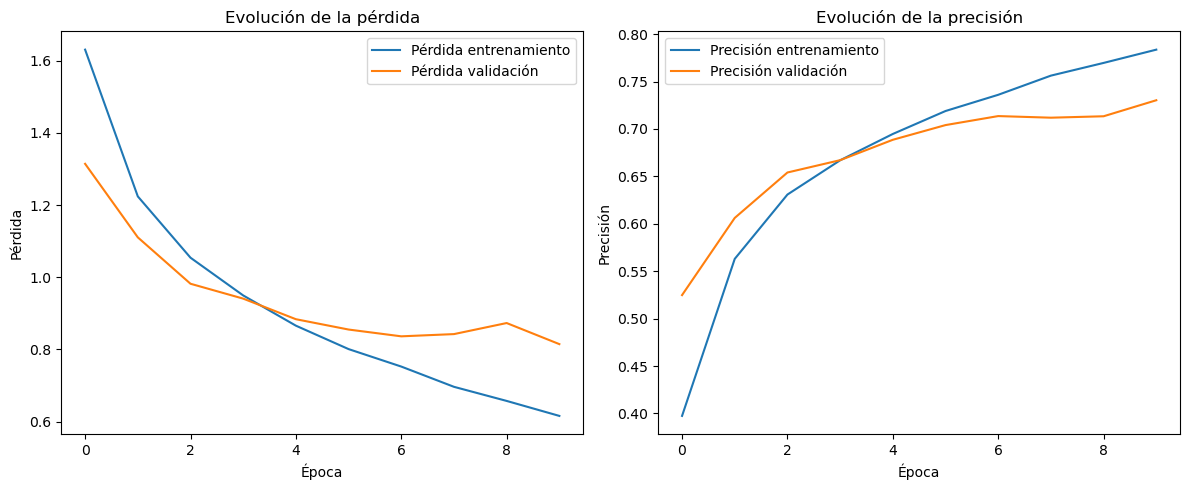

In [40]:
# Dibuja las curvas de entrenamiento y validación (pérdida y precisión)
plt.figure(figsize=(12, 5))

# Curva de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Evolución de la pérdida')
plt.legend()

# Curva de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Evolución de la precisión')
plt.legend()

plt.tight_layout()
plt.show()